In [2]:
import numpy as np
import cmath
from scipy import optimize as opt
from matplotlib import pyplot as pp

In [2]:
muSC=3.
mu=50
m=.5
W=10.
phi=1.5*np.pi

In [3]:
def EQ(B):
    if B>mu:
        trigo=np.sqrt(2*m*(B+mu))*W
        trigoh=np.sqrt(2*m*(B-mu))*W
        eqz=-np.cos(trigo)*np.cosh(trigoh)+np.sin(trigo)*np.sinh(trigoh)*(muSC**2+mu**2-B**2)/(2*muSC*np.sqrt(B**2-mu**2))+\
        np.cos(phi)
    else:
        eqz=1000000
    return eqz

In [4]:
M=100
phiarray=np.linspace(0,2*np.pi,M+1)

Bmin=mu
Bmax=10*mu

x0roots=np.linspace(Bmin,Bmax,np.int((Bmax-Bmin)/1.))
BphiList=[0]*len(phiarray)

for j in range(len(phiarray)):
    phi=phiarray[j]
    #print('{}) phi={}'.format(j+1,phi))
    Barray=[]
    for i in range(len(x0roots)):
        #print('{}-{}'.format(j+1,i+1))
        x0=x0roots[i]
        solekx=opt.fsolve(EQ,np.asarray(x0))
        if abs(EQ(solekx))>10**-10 or solekx<=0:
            solekx=[]
        solekx=np.ndarray.tolist(np.around(solekx,6))
        #print(solekx)
        Barray.extend(solekx)
    Barray=sorted(list(set(Barray)))
    BphiList[j]=Barray

/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


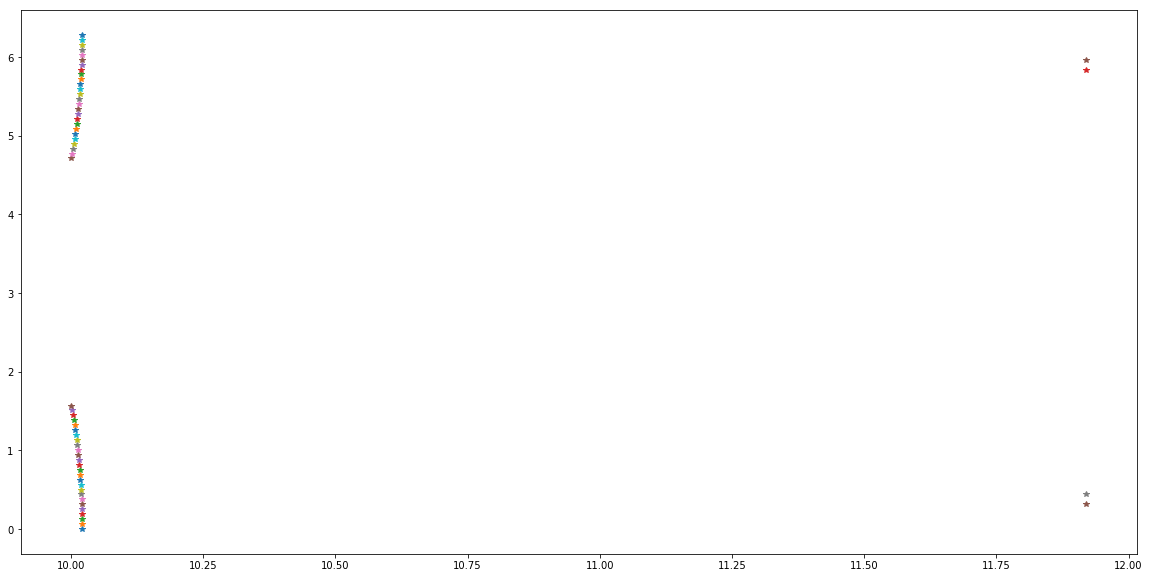

In [5]:
pp.figure(figsize=(20,10))
for i in range(M+1):
    pp.plot(BphiList[i],[phiarray[i]]*len(BphiList[i]),'*')

#pp.axis([0.55,.65,0,6.2])

**Complete scattering matrix in e/h x spin x L/R space**

In [3]:
import cmath
import scipy

In [658]:
m=0.5
W=2.
mu=50.
muSC=3.

k0=cmath.sqrt(2*m*muSC)

def k1(s,B):
    if s==1 or s==0: #k1(1)=kappa k1(0)=tilde k
        kk=cmath.sqrt(2*m*(mu+(-1)**(s)*B))
    else:
        print("error: spin up (1) or down (0)")
    return kk

def rL(s,B):
    #using sinc for sin(0)/0 #sinc(x)=sin(pi x)/pi x => W sinc(Wk/pi) = W sin(Wk)/Wk = sin(Wk)/k
    return -1j*(k0**2-k1(s,B)**2)/(2*k0)*W*np.sinc(k1(s,B)*W/np.pi)/NNr(s,B)
def rR(s,B):
    return rL(s,B)*cmath.exp(-2*1j*W*k0)

def tLR(s,B):
    return cmath.exp(-1j*W*k0)/NNr(s,B)

def NNr(s,B):
    return np.cos(k1(s,B)*W)-1j*(k0**2+k1(s,B)**2)/(2*k0)*W*np.sinc(k1(s,B)*W/np.pi)

def Se(s,B):
    return np.array([[rL(s,B),tLR(s,B)],[tLR(s,B),rR(s,B)]])

def Sh(s,B):
    #by particle/hole symmetry, Sh=s2 Se* s2 => exchange on diagonal + cc
    return np.conj(Se(1-s,B))

def fullSJ(B):
    return scipy.linalg.block_diag(Se(1,B),Se(0,B),Sh(1,B),Sh(0,B))

def SSC(phi):
    alp=-1j*cmath.exp(1j*phi/2)
    alm=-1j*cmath.exp(-1j*phi/2)
    return np.array([[0,0,0,0,alp,0,0,0],
            [0,0,0,0,0,alm,0,0],
            [0,0,0,0,0,0,alp,0],
            [0,0,0,0,0,0,0,alm],
            [alm,0,0,0,0,0,0,0],
            [0,alp,0,0,0,0,0,0],
            [0,0,alm,0,0,0,0,0],
            [0,0,0,alp,0,0,0,0]])

def detScat(B,phi):
    return abs(np.linalg.det(np.eye(8)-np.matmul(SSC(phi),fullSJ(B))))

In [659]:
#intermediate determinantal equations
def EQdet1(B,phi):
    rAp=cmath.exp(1j*phi/2)
    rAm=cmath.exp(-1j*phi/2)
    reflAnd=np.array([[rAp,0,0,0],
             [0,rAm,0,0],
             [0,0,rAp,0],
             [0,0,0,rAm]])
    scatE=scipy.linalg.block_diag(Se(1,B),Se(0,B))
    scatH=scipy.linalg.block_diag(Sh(1,B),Sh(0,B))
    #alpha=-i
    return abs(np.linalg.det(np.eye(4)+np.matmul(np.conj(reflAnd),np.matmul(scatE,np.matmul(reflAnd,scatH)))))

In [660]:
#intermediate determinantal equations
def etas(s,B):
    return np.angle(Se(s,B)[0][1])
def SqDs(s,B):
    return abs(Se(s,B)[0][1])
def SqRs(s,B):
    return abs(Se(s,B)[0][0])
def gams(s,B):
    return np.angle(Se(s,B)[0][0])-etas(s,B)

def EQdet2(B,phi): #has same zeros but different normalization
    etaT=etas(1,B)-etas(0,B)
    gamT=gams(1,B)-gams(0,B)
    RT=SqRs(0,B)*SqRs(1,B)
    DT=SqDs(0,B)*SqDs(1,B)
    return abs(np.cos(etaT)+RT*np.cos(gamT)+DT*np.cos(phi))

In [414]:
EQdet2(1,np.pi)

-0.09838920267701079

In [664]:
phi=np.pi
Bxarray=np.linspace(100,110,100)
#detarray=[detScat(B,phi) for B in Bxarray]
detarray1=[EQdet1(B,phi) for B in Bxarray]
detarray2=[EQdet2(B,phi) for B in Bxarray]
detarray3=[EQsign(B,phi) for B in Bxarray]

[0, 150, 0, 15]

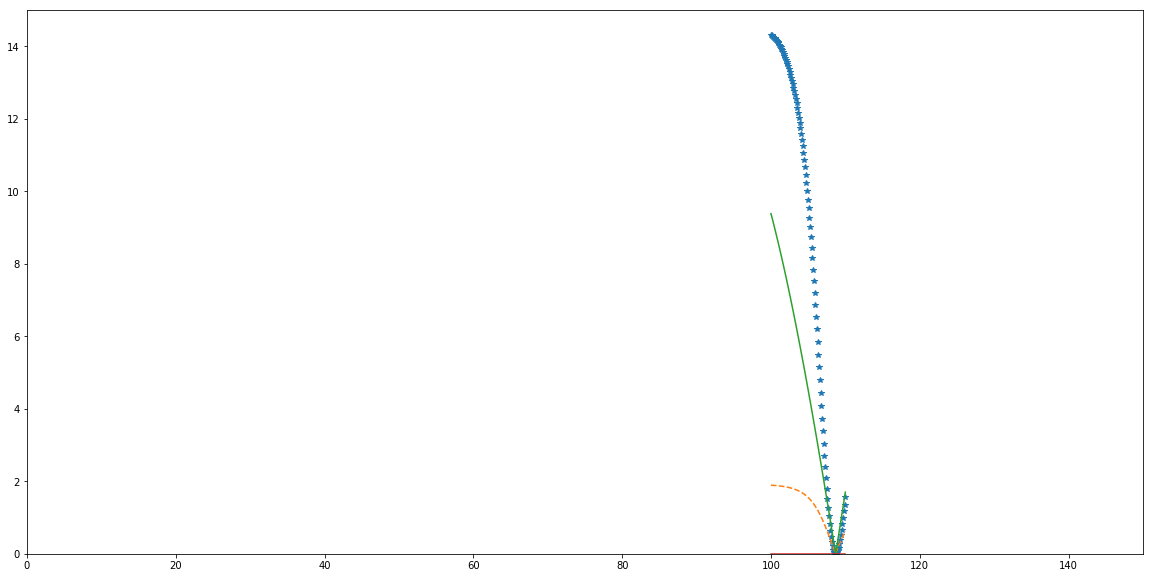

In [665]:
pp.figure(figsize=(20,10))
#pp.plot(Bxarray,detarray,'.')
pp.plot(Bxarray,detarray1,'*')
pp.plot(Bxarray,detarray2,'--')
pp.plot(Bxarray,detarray3,'-')
pp.plot(Bxarray,[0]*len(Bxarray))
pp.axis([0,150,0,15])

cosarray=[np.cos(k1(0,B)*W) for B in np.linspace(0,1000,500)]
pp.plot(np.linspace(0,1000,500),cosarray)

In [645]:
import time

In [655]:
start=time.time()
M=100
phiarray=np.linspace(0,2*np.pi,M+1)
#phiarray=[np.pi]

Bmin=0
Bmax=65.
x0roots=np.linspace(Bmin,Bmax,np.int((Bmax-Bmin)/1.)+1)
BphiList=[0]*len(phiarray)

for j in range(len(phiarray)):
    phi=phiarray[j]
    print('{}) phi={}'.format(j+1,phi))
    
    def EQsignred(B):
        return EQsign(B,phi)
    
    Barray=[]
    for i in range(len(x0roots)):
        #print('{}-{}'.format(j+1,i+1))
        x0=x0roots[i]
        solekx=opt.fsolve(EQsignred,np.asarray(x0))
        if abs(EQsignred(solekx))>10**-10 or solekx<=0:
            solekx=[]
        solekx=np.ndarray.tolist(np.around(solekx,6))
        #print(solekx)
        Barray.extend(solekx)
    Barray=sorted(list(set(Barray)))
    BphiList[j]=Barray

end=time.time()
print('duration={}'.format(end-start))

1) phi=0.0
2) phi=0.0628318530718
3) phi=0.125663706144
4) phi=0.188495559215
5) phi=0.251327412287
6) phi=0.314159265359
7) phi=0.376991118431
8) phi=0.439822971503
9) phi=0.502654824574


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in cos
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in cdouble_scalars
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in sin
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


10) phi=0.565486677646
11) phi=0.628318530718
12) phi=0.69115038379
13) phi=0.753982236862
14) phi=0.816814089933
15) phi=0.879645943005
16) phi=0.942477796077
17) phi=1.00530964915
18) phi=1.06814150222
19) phi=1.13097335529
20) phi=1.19380520836
21) phi=1.25663706144
22) phi=1.31946891451
23) phi=1.38230076758
24) phi=1.44513262065
25) phi=1.50796447372
26) phi=1.57079632679
27) phi=1.63362817987
28) phi=1.69646003294
29) phi=1.75929188601
30) phi=1.82212373908
31) phi=1.88495559215
32) phi=1.94778744523
33) phi=2.0106192983
34) phi=2.07345115137
35) phi=2.13628300444
36) phi=2.19911485751
37) phi=2.26194671058
38) phi=2.32477856366
39) phi=2.38761041673
40) phi=2.4504422698
41) phi=2.51327412287
42) phi=2.57610597594
43) phi=2.63893782902
44) phi=2.70176968209
45) phi=2.76460153516
46) phi=2.82743338823
47) phi=2.8902652413
48) phi=2.95309709437
49) phi=3.01592894745
50) phi=3.07876080052
51) phi=3.14159265359
52) phi=3.20442450666
53) phi=3.26725635973
54) phi=3.33008821281
55) phi

Text(0,0.5,'$\\phi$')

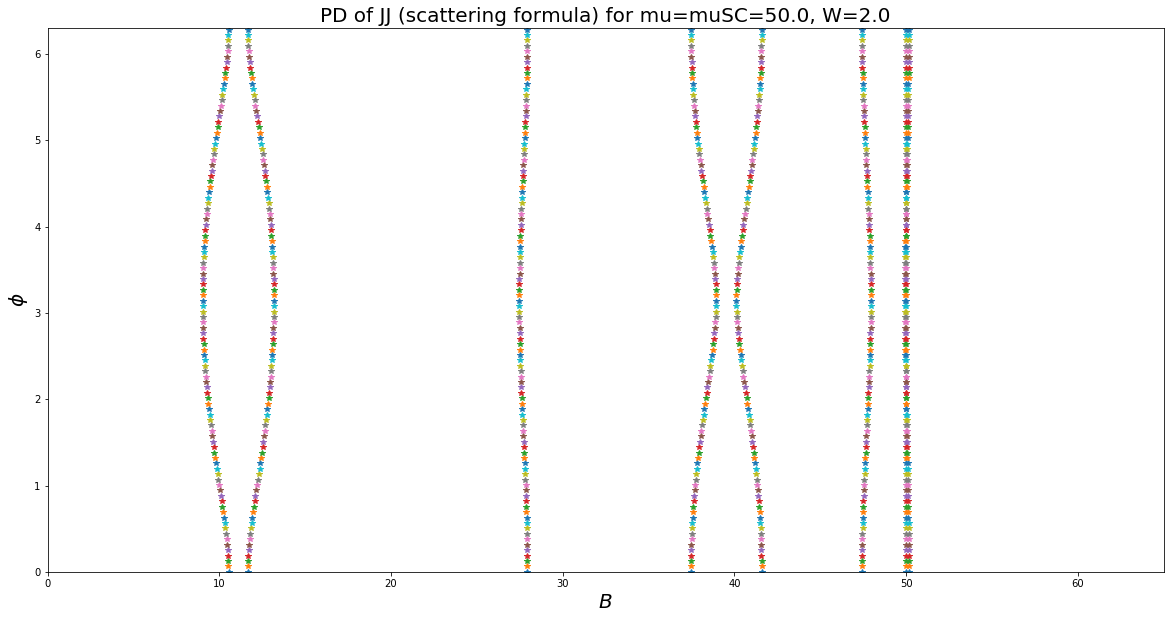

In [656]:
pp.figure(figsize=(20,10))
for i in range(len(phiarray)):
    pp.plot(BphiList[i],[phiarray[i]]*len(BphiList[i]),'*')

pp.axis([0,65,0,6.3])
pp.title('PD of JJ (scattering formula) for mu=muSC={}, W={}'.format(mu,W), fontsize=20)
pp.xlabel('$B$',fontsize=20)
pp.ylabel('$\phi$',fontsize=20)

[0, 30, 0, 1000.0]

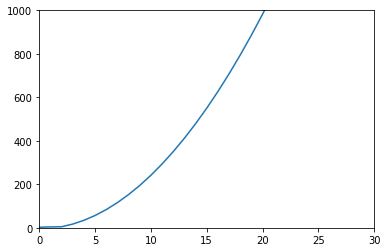

In [256]:
pp.plot(BphiList[0],'-')
#pp.plot(pre,'*')
pp.axis([0,30,Bmin,Bmax])

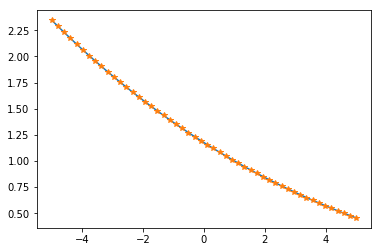

In [606]:
gh=np.linspace(-5,5)
cosgh=[np.sin(cmath.sqrt(trt-1))/cmath.sqrt(trt-1) for trt in gh]
coshg=[np.sinh(cmath.sqrt(1-trt))/cmath.sqrt(1-trt) for trt in gh]
pp.plot(gh,cosgh)
pp.plot(gh,coshg,'*')

** Analytical derivation for B>mu **

In [657]:
def EQsign(B,phi):
    #if B<=mu:
    ktw=k1(0,B)*W #R
    kap=k1(1,B)*W #R
    return abs((np.cos(ktw)*np.cos(kap)+(muSC**2+mu**2-B**2)/(2*muSC*cmath.sqrt(mu**2-B**2))*np.sin(ktw)*np.sin(kap)\
                   +np.cos(phi))/np.cos(kap)) #cos is useful to normalize the function when B>mu (cosh)
    #else:
    #ktw=k1(0,B)*W #R
    #kap=k1(1,B)*W #I
    #return abs((np.cos(ktw)*np.cosh(kap)+(muSC**2+mu**2-B**2)/(2*muSC*cmath.sqrt(B**2-mu**2))*np.sin(ktw)*np.sinh(kap)\
    #               +np.cos(phi))/np.cosh(kap))

In [507]:
#intermediate determinantal equations
#def kap(s,B):
#    if B>mu:
#        return np.imag(k1(s,B))
#    else:
#        print('error: B<mu')
def etas2(s,B):
    return -W*k0+np.arctan((k0**2+k1(s,B)**2)/(2*k0*k1(s,B))*np.tan(W*k1(s,B)))
def SqDs2(s,B):
    return np.sqrt(np.cos(W*k1(s,B))**2+((k0**2+k1(s,B)**2)/(2*k0*k1(s,B))*np.sin(W*k1(s,B)))**2)
def SqRs2(s,B):#can be more specialized later
    return np.sqrt(1-SqDs2(s,B)**2)

def cosgamT(B):
    return np.sign(np.sin(W*k1(0,B)))*np.sign(k0**2-k1(0,B))*np.sign(np.sin(W*k1(1,B)))*np.sign(k0**2-k1(1,B))

def EQsign1(B,phi): #has same zeros but different normalization
    etaT=etas2(1,B)-etas2(0,B)
    RT=SqRs2(0,B)*SqRs2(1,B)
    DT=SqDs2(0,B)*SqDs2(1,B)
    return np.cos(etaT)+RT*cosgamT(B)+DT*np.cos(phi)

In [300]:
M=50
phiarray=np.linspace(0,2*np.pi,M+1)
#phiarray=[np.pi]

Bmin=0
Bmax=50.
x0roots=np.linspace(Bmin,Bmax,np.int((Bmax-Bmin)/1.)+1)
BphiList=[0]*len(phiarray)

for j in range(len(phiarray)):
    phi=phiarray[j]
    print('{}) phi={}'.format(j+1,phi))
    
    def EQsignred(B):
        return EQsign(B,phi)
    
    Barray=[]
    for i in range(len(x0roots)):
        #print('{}-{}'.format(j+1,i+1))
        x0=x0roots[i]
        solekx=opt.fsolve(EQsignred,np.asarray(x0))
        if abs(EQsignred(solekx))>10**-10 or solekx<=0:
            solekx=[]
        solekx=np.ndarray.tolist(np.around(solekx,6))
        #print(solekx)
        Barray.extend(solekx)
    Barray=sorted(list(set(Barray)))
    BphiList[j]=Barray

1) phi=0.0
2) phi=0.125663706144
3) phi=0.251327412287
4) phi=0.376991118431
5) phi=0.502654824574
6) phi=0.628318530718
7) phi=0.753982236862
8) phi=0.879645943005
9) phi=1.00530964915
10) phi=1.13097335529
11) phi=1.25663706144
12) phi=1.38230076758
13) phi=1.50796447372
14) phi=1.63362817987
15) phi=1.75929188601
16) phi=1.88495559215
17) phi=2.0106192983
18) phi=2.13628300444
19) phi=2.26194671058
20) phi=2.38761041673
21) phi=2.51327412287
22) phi=2.63893782902
23) phi=2.76460153516
24) phi=2.8902652413
25) phi=3.01592894745
26) phi=3.14159265359
27) phi=3.26725635973
28) phi=3.39292006588
29) phi=3.51858377202
30) phi=3.64424747816
31) phi=3.76991118431
32) phi=3.89557489045
33) phi=4.02123859659
34) phi=4.14690230274
35) phi=4.27256600888
36) phi=4.39822971503
37) phi=4.52389342117
38) phi=4.64955712731
39) phi=4.77522083346
40) phi=4.9008845396
41) phi=5.02654824574
42) phi=5.15221195189
43) phi=5.27787565803
44) phi=5.40353936417
45) phi=5.52920307032
46) phi=5.65486677646
47)

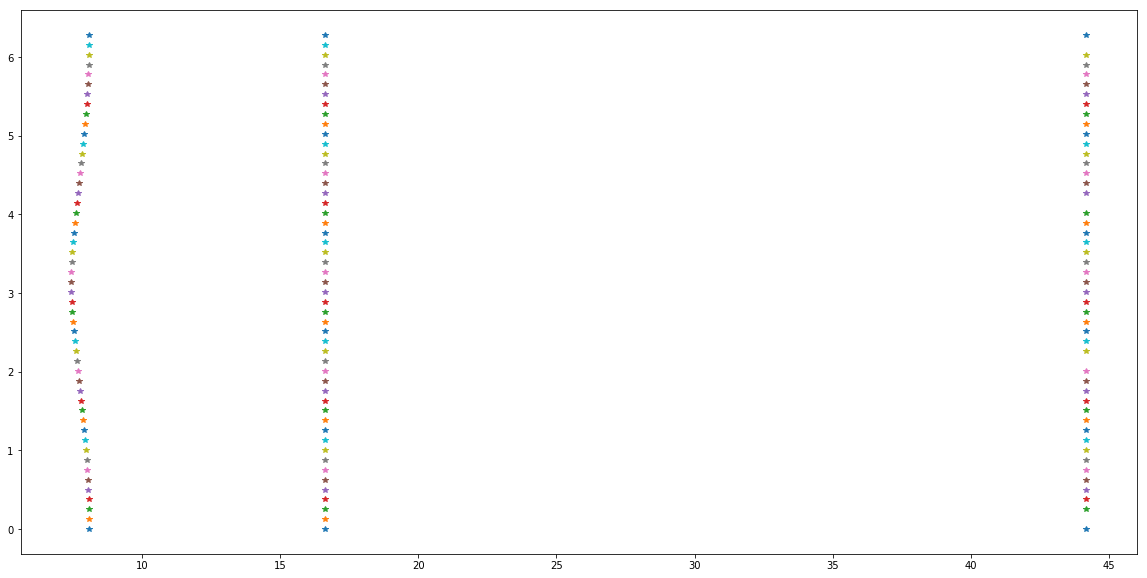

In [310]:
pp.figure(figsize=(20,10))
for i in range(len(phiarray)):
    pp.plot(BphiList[i],[phiarray[i]]*len(BphiList[i]),'*')

#pp.axis([44.165,44.168,0,6.3])

In [302]:
Bxarray2=np.linspace(0,100,100000)
EQarray=[EQsign(B,1) for B in Bxarray2]

[0, 100, 0.0, 16]

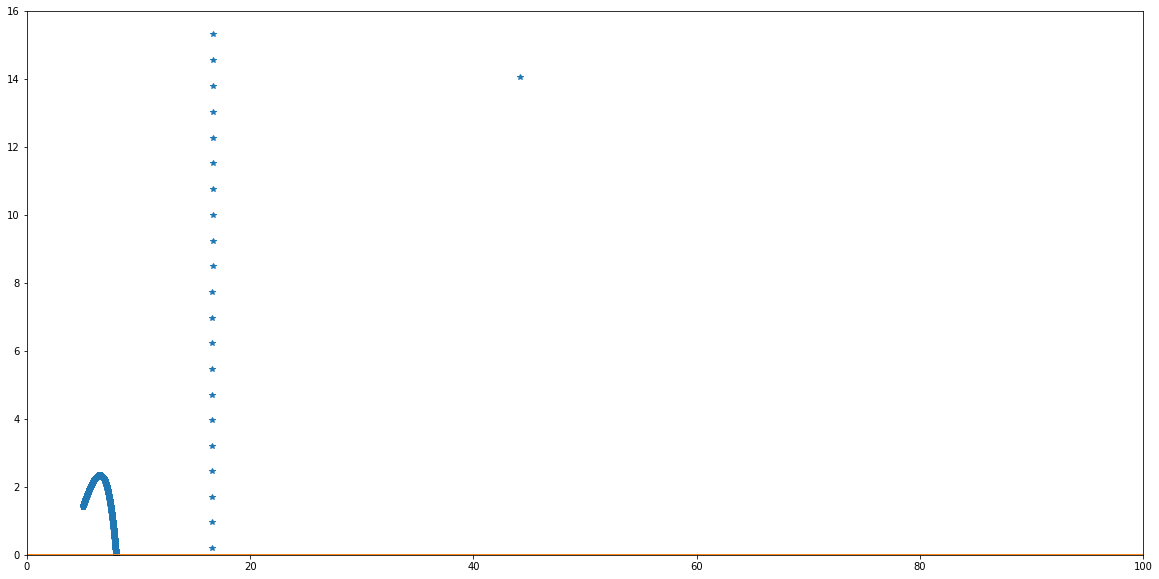

In [303]:
pp.figure(figsize=(20,10))
pp.plot(Bxarray2,EQarray,'*')
pp.plot(Bxarray2,[0]*len(Bxarray2))
pp.axis([0,100,0.,16])